### Libraries

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from prices import *

from datetime import datetime, timedelta

### Load Preprocessed Data File

In [191]:
df = pd.read_csv("data/preprocessed_data.csv")
df.head(5)

,Unnamed: 0,UserID,Date,Hour,Consumption_KWh,Method,Datetime,Day_of_Week,Time_of_Day,Load_Type,Season,electricity_cost,season,seasonal_factor,seasonal_load,usage_category
0,0,0,2021-08-03,1,0.100,R,2021-08-03 01:00:00,1,Night,Off-Peak Load,3,0.13593,Fall,1.3,0.1300,Off-Peak Hours
1,1,0,2021-08-03,2,0.073,R,2021-08-03 02:00:00,1,Night,Off-Peak Load,3,0.13354,Fall,1.3,0.0949,Off-Peak Hours
2,2,0,2021-08-03,3,0.083,R,2021-08-03 03:00:00,1,Night,Off-Peak Load,3,0.13284,Fall,1.3,0.1079,Off-Peak Hours
3,3,0,2021-08-03,4,0.073,R,2021-08-03 04:00:00,1,Night,Off-Peak Load,3,0.13392,Fall,1.3,0.0949,Off-Peak Hours
4,4,0,2021-08-03,5,0.073,R,2021-08-03 05:00:00,1,Night,Off-Peak Load,3,0.13530,Fall,1.3,0.0949,Off-Peak Hours


In [192]:
# Convert 'Date' and 'Datetime' columns to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [193]:
df = df.drop(columns=['Unnamed: 0','seasonal_factor', 'seasonal_load', 'Load_Type'])

In [195]:
df.head(5)

,UserID,Date,Hour,Consumption_KWh,Method,Datetime,Day_of_Week,Time_of_Day,Season,electricity_cost,season,usage_category
0,0,2021-08-03,1,0.100,R,2021-08-03 01:00:00,1,Night,3,0.13593,Fall,Off-Peak Hours
1,0,2021-08-03,2,0.073,R,2021-08-03 02:00:00,1,Night,3,0.13354,Fall,Off-Peak Hours
2,0,2021-08-03,3,0.083,R,2021-08-03 03:00:00,1,Night,3,0.13284,Fall,Off-Peak Hours
3,0,2021-08-03,4,0.073,R,2021-08-03 04:00:00,1,Night,3,0.13392,Fall,Off-Peak Hours
4,0,2021-08-03,5,0.073,R,2021-08-03 05:00:00,1,Night,3,0.13530,Fall,Off-Peak Hours


### Peak, Mid-Peak, Off-Peak Electricity Consumption Analysis

In [196]:
# Grouping by 'Season' and 'usage_category', then calculating max, min, and mean consumption
peakAalysis = df.groupby(['season', 'usage_category'])['Consumption_KWh'].agg(['max', 'min', 'mean'])

# Displaying the result
print(peakAalysis)

                         max  min      mean
season usage_category                      
Fall   Mid-Peak Hours  2.874  0.0  0.350766
       Off-Peak Hours  2.781  0.0  0.237936
       Peak Hours      2.884  0.0  0.293196
Spring Mid-Peak Hours  5.016  0.0  0.463157
       Off-Peak Hours  4.884  0.0  0.355300
       Peak Hours      3.987  0.0  0.387198
Summer Mid-Peak Hours  4.036  0.0  0.396758
       Off-Peak Hours  4.288  0.0  0.288102
       Peak Hours      3.917  0.0  0.328894
Winter Mid-Peak Hours  3.909  0.0  0.386096
       Off-Peak Hours  4.146  0.0  0.259344
       Peak Hours      3.669  0.0  0.334950


### Cost Analysis

In [197]:
# Grouping by 'Season' and 'usage_category', then calculating max, min, and mean consumption
costAalysis = df.groupby(['season', 'usage_category'])['electricity_cost'].agg(['max', 'min', 'mean'])

# Displaying the result
print(costAalysis)

                           max      min      mean
season usage_category                            
Fall   Mid-Peak Hours  0.67034  0.07163  0.254491
       Off-Peak Hours  0.71260  0.01865  0.240126
       Peak Hours      0.65867  0.13006  0.302487
Spring Mid-Peak Hours  0.51158  0.04995  0.234391
       Off-Peak Hours  0.49183  0.02083  0.192851
       Peak Hours      0.53681  0.02997  0.294036
Summer Mid-Peak Hours  0.82273  0.03136  0.211340
       Off-Peak Hours  0.74425  0.02505  0.182155
       Peak Hours      0.95401  0.03142  0.266218
Winter Mid-Peak Hours  0.64019  0.07677  0.249129
       Off-Peak Hours  0.66017  0.01168  0.216399
       Peak Hours      0.64845  0.09726  0.295318


### Display Top(N) by Consumption

#### Days Consumed most Electricity Consumed

In [199]:
df.sort_values(['Consumption_KWh'], ascending=False).head(10)

,UserID,Date,Hour,Consumption_KWh,Method,Datetime,Day_of_Week,Time_of_Day,Season,electricity_cost,season,usage_category
30152,2,2022-02-21,8,5.016,R,2022-02-21 08:00:00,0,Morning,1,0.30721,Spring,Mid-Peak Hours
28463,2,2021-12-12,23,4.884,R,2021-12-12 23:00:00,6,Evening,1,0.32983,Spring,Off-Peak Hours
29446,2,2022-01-22,22,4.700,R,2022-01-22 22:00:00,5,Evening,1,0.26042,Spring,Off-Peak Hours
29278,2,2022-01-15,22,4.596,R,2022-01-15 22:00:00,5,Evening,1,0.28512,Spring,Off-Peak Hours
29781,2,2022-02-05,21,4.551,R,2022-02-05 21:00:00,5,Evening,1,0.28306,Spring,Off-Peak Hours
28464,2,2021-12-12,24,4.418,R,2021-12-13 00:00:00,6,Night,1,0.32186,Spring,Off-Peak Hours
29808,2,2022-02-06,24,4.385,R,2022-02-07 00:00:00,6,Night,1,0.24643,Spring,Off-Peak Hours
30143,2,2022-02-20,23,4.305,R,2022-02-20 23:00:00,6,Evening,1,0.26045,Spring,Off-Peak Hours
30643,2,2022-03-13,19,4.288,R,2022-03-13 19:00:00,6,Evening,2,0.45238,Summer,Off-Peak Hours
30142,2,2022-02-20,22,4.215,R,2022-02-20 22:00:00,6,Evening,1,0.27047,Spring,Off-Peak Hours


In [201]:
#### Days Consumed minimum Electricity Consumed

In [200]:
df.sort_values(['Consumption_KWh'], ascending=True).head(10)

,UserID,Date,Hour,Consumption_KWh,Method,Datetime,Day_of_Week,Time_of_Day,Season,electricity_cost,season,usage_category
45314,3,2021-11-21,2,0.0,R,2021-11-21 02:00:00,6,Night,4,0.30408,Winter,Off-Peak Hours
47161,3,2022-02-06,1,0.0,R,2022-02-06 01:00:00,6,Night,1,0.23911,Spring,Off-Peak Hours
47160,3,2022-02-05,24,0.0,R,2022-02-06 00:00:00,5,Night,1,0.24775,Spring,Off-Peak Hours
47159,3,2022-02-05,23,0.0,R,2022-02-05 23:00:00,5,Evening,1,0.24516,Spring,Off-Peak Hours
47158,3,2022-02-05,22,0.0,R,2022-02-05 22:00:00,5,Evening,1,0.26684,Spring,Off-Peak Hours
47186,3,2022-02-07,2,0.0,R,2022-02-07 02:00:00,0,Night,1,0.23608,Spring,Off-Peak Hours
47185,3,2022-02-07,1,0.0,R,2022-02-07 01:00:00,0,Night,1,0.23753,Spring,Off-Peak Hours
47184,3,2022-02-06,24,0.0,R,2022-02-07 00:00:00,6,Night,1,0.24643,Spring,Off-Peak Hours
47183,3,2022-02-06,23,0.0,R,2022-02-06 23:00:00,6,Evening,1,0.24601,Spring,Off-Peak Hours
47182,3,2022-02-06,22,0.0,R,2022-02-06 22:00:00,6,Evening,1,0.28636,Spring,Off-Peak Hours


### Daily Electricity Usage Pattern

/home/imran/anaconda3/envs/huggingface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imran/anaconda3/envs/huggingface/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/imran/anaconda3/envs/huggingface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/imran/anaconda3/envs/huggingface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

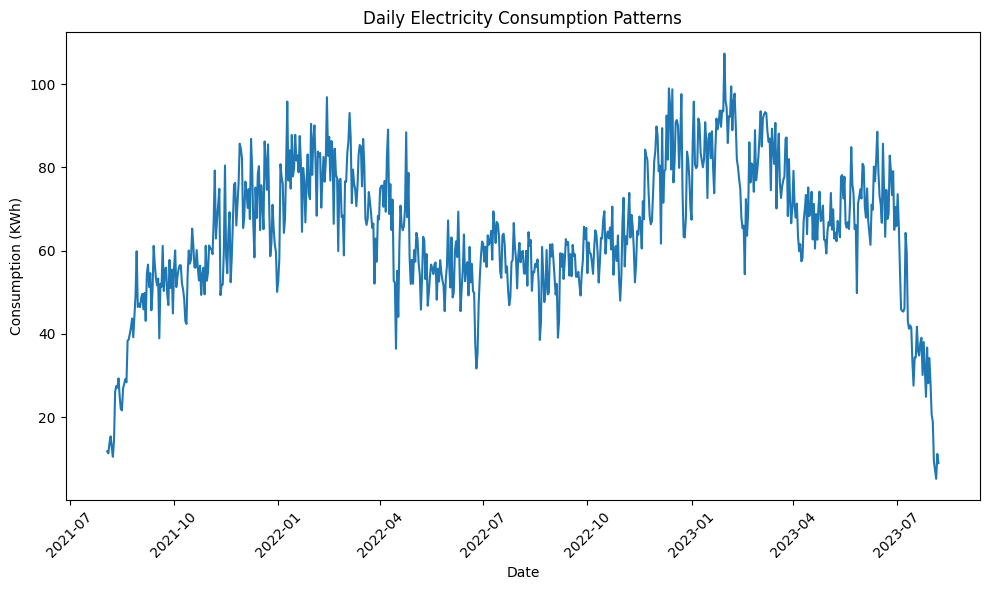

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate consumption by date
daily_consumption = df.groupby('Date')['Consumption_KWh'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the consumption over time
sns.lineplot(x='Date', y='Consumption_KWh', data=daily_consumption)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Daily Electricity Consumption Patterns')
plt.xlabel('Date')
plt.ylabel('Consumption (KWh)')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Grouping by 'Season' and 'usage_category', then calculating max, min, and mean consumption
costAalysis = df.groupby(['season', 'usage_category'])['electricity_cost'].agg(['max', 'min', 'mean'])

# Displaying the result
print(costAalysis)

  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       26
1    B       20       25       15       21
2    C       12       15       19        6
3    D       10       18       11       19


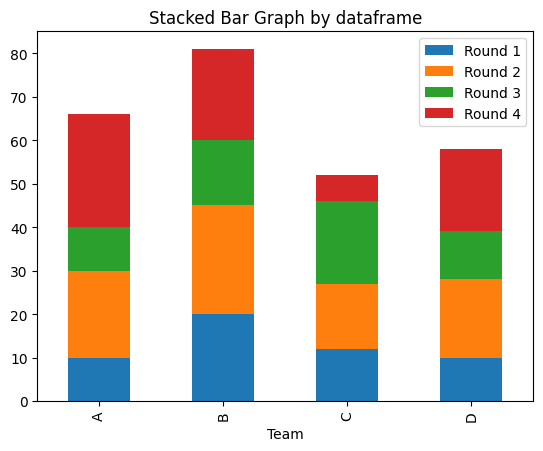

In [70]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# create data
df = pd.DataFrame([['A', 10, 20, 10, 26], ['B', 20, 25, 15, 21], ['C', 12, 15, 19, 6],
                   ['D', 10, 18, 11, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
 
# plot data in stack manner of bar type
df.plot(x='Team', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

In [75]:
import pandas as pd

# Corrected sample data
date = ['2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03',
             '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03',
             '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', 
        '2021-08-03','2021-08-03', '2021-08-03', '2021-08-03', '2021-08-04', '2021-08-04']
hour = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2]

Consumption_KWh = [0.1, 0.073, 0.083, 0.073, 0.073, 0.078, 0.077, 0.076, 0.479, 0.214, 0.2, 0.211, 0.182, 0.228,
                        0.151, 0.192, 0.194, 0.221, 0.327, 0.341, 0.233, 0.237, 0.274, 0.216, 0.109, 0.079]
Time_of_Day = ['Night', 'Night', 'Night', 'Night', 'Night', 'Night', 'Morning', 'Morning', 'Morning', 'Morning',
                    'Morning', 'Morning', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon',
                    'Evening', 'Evening', 'Evening', 'Evening', 'Evening', 'Night', 'Night']

print(len(date), len(hour), len(Consumption_KWh), len(Time_of_Day))
data = {
    'Date': ['2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03',
             '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03',
             '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-03',
             '2021-08-03', '2021-08-03', '2021-08-03', '2021-08-04', '2021-08-04'],
    'Hour': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2],
    'Consumption_KWh': [0.1, 0.073, 0.083, 0.073, 0.073, 0.078, 0.077, 0.076, 0.479, 0.214, 0.2, 0.211, 0.182, 0.228,
                        0.151, 0.192, 0.194, 0.221, 0.327, 0.341, 0.233, 0.237, 0.274, 0.216, 0.109, 0.079],
    'Time_of_Day': ['Night', 'Night', 'Night', 'Night', 'Night', 'Night', 'Morning', 'Morning', 'Morning', 'Morning',
                    'Morning', 'Morning', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon',
                    'Evening', 'Evening', 'Evening', 'Evening', 'Evening', 'Night', 'Night', 'Night']
}


# Convert to DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame
pivot_df = df.pivot_table(index='Date', columns='Time_of_Day', values='Consumption_KWh', aggfunc='sum')

# Reorder columns according to Time_of_Day
time_of_day_order = ['Night', 'Morning', 'Afternoon', 'Evening']
pivot_df = pivot_df[time_of_day_order]

print(pivot_df)


26 26 26 25
Time_of_Day  Night  Morning  Afternoon  Evening
Date                                           
2021-08-03   0.696    1.257      1.168    1.412
2021-08-04   0.188      NaN        NaN      NaN


In [202]:
df_week = df[0:168]

In [203]:
df_week.tail(3)

,UserID,Date,Hour,Consumption_KWh,Method,Datetime,Day_of_Week,Time_of_Day,Season,electricity_cost,season,usage_category
165,0,2021-08-09,22,0.095,R,2021-08-09 22:00:00,0,Evening,3,0.17987,Fall,Mid-Peak Hours
166,0,2021-08-09,23,0.202,R,2021-08-09 23:00:00,0,Evening,3,0.17819,Fall,Mid-Peak Hours
167,0,2021-08-09,24,0.272,R,2021-08-10 00:00:00,0,Night,3,0.14599,Fall,Off-Peak Hours


In [207]:
# Aggregate consumption by date
daily_consumption = df_week.groupby('Date')['Consumption_KWh'].sum().reset_index()
print(daily_consumption)

        Date  Consumption_KWh
0 2021-08-03            4.533
1 2021-08-04            4.552
2 2021-08-05            5.777
3 2021-08-06            5.590
4 2021-08-07            3.306
5 2021-08-08            2.575
6 2021-08-09            4.648


In [206]:
test = df_week.groupby(['Date')['Consumption_KWh', 'Time_of_Day']].sum()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3410113024.py, line 1)

In [156]:
print(test)

Date        Time_of_Day
2021-08-03  Afternoon      1.168
            Evening        1.412
            Morning        1.257
            Night          0.696
2021-08-04  Afternoon      1.319
            Evening        1.443
            Morning        0.888
            Night          0.902
2021-08-05  Afternoon      1.361
            Evening        0.886
            Morning        1.426
            Night          2.104
2021-08-06  Afternoon      1.579
            Evening        1.788
            Morning        1.022
            Night          1.201
2021-08-07  Afternoon      0.798
            Evening        0.561
            Morning        0.704
            Night          1.243
2021-08-08  Afternoon      0.622
            Evening        0.387
            Morning        0.762
            Night          0.804
2021-08-09  Afternoon      1.376
            Evening        0.854
            Morning        0.851
            Night          1.567
Name: Consumption_KWh, dtype: float64


In [157]:
# Pivot the DataFrame
pivot_df = df_week.pivot_table(index='Date', columns='Time_of_Day', values='Consumption_KWh', aggfunc='sum')

# Reorder columns according to Time_of_Day
time_of_day_order = ['Night', 'Morning', 'Afternoon', 'Evening']
pivot_df = pivot_df[time_of_day_order]

print(pivot_df)


Time_of_Day  Night  Morning  Afternoon  Evening
Date                                           
2021-08-03   0.696    1.257      1.168    1.412
2021-08-04   0.902    0.888      1.319    1.443
2021-08-05   2.104    1.426      1.361    0.886
2021-08-06   1.201    1.022      1.579    1.788
2021-08-07   1.243    0.704      0.798    0.561
2021-08-08   0.804    0.762      0.622    0.387
2021-08-09   1.567    0.851      1.376    0.854


In [159]:
# Get index and data from the pivot table
index_values = pivot_df.index
data_values = pivot_df.values

# Print index and data
print("Index:")
print(index_values)
print("\nData:")
print(data_values)
formatted_data = {}
for i, date in enumerate(index_values):
    for time_of_day, consumption in data_values:
        formatted_data[(date, time_of_day)] = consumption[i]
print(formatted_data)

Index:
DatetimeIndex(['2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
               '2021-08-07', '2021-08-08', '2021-08-09'],
              dtype='datetime64[ns]', name='Date', freq=None)

Data:
[[0.696 1.257 1.168 1.412]
 [0.902 0.888 1.319 1.443]
 [2.104 1.426 1.361 0.886]
 [1.201 1.022 1.579 1.788]
 [1.243 0.704 0.798 0.561]
 [0.804 0.762 0.622 0.387]
 [1.567 0.851 1.376 0.854]]


ValueError: too many values to unpack (expected 2)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>) -> None

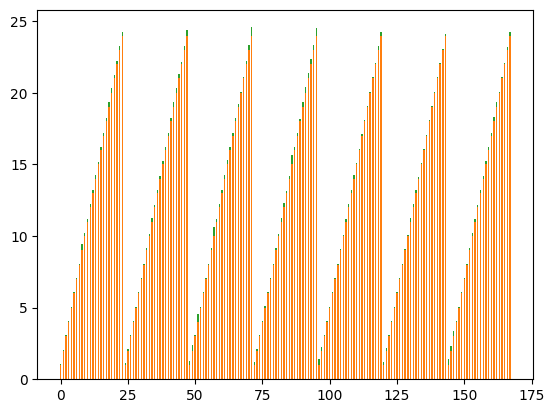

In [102]:
# view data
#print(df)
 
# plot data in stack manner of bar type
df_week.plot(x='Date', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

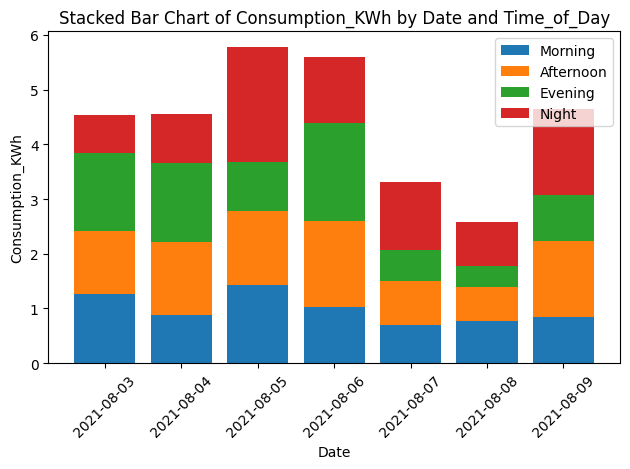

In [133]:
import matplotlib.pyplot as plt

# Provided data
data = {
    ('2021-08-03', 'Afternoon'): 1.168,
    ('2021-08-03', 'Evening'): 1.412,
    ('2021-08-03', 'Morning'): 1.257,
    ('2021-08-03', 'Night'): 0.696,
    ('2021-08-04', 'Afternoon'): 1.319,
    ('2021-08-04', 'Evening'): 1.443,
    ('2021-08-04', 'Morning'): 0.888,
    ('2021-08-04', 'Night'): 0.902,
    ('2021-08-05', 'Afternoon'): 1.361,
    ('2021-08-05', 'Evening'): 0.886,
    ('2021-08-05', 'Morning'): 1.426,
    ('2021-08-05', 'Night'): 2.104,
    ('2021-08-06', 'Afternoon'): 1.579,
    ('2021-08-06', 'Evening'): 1.788,
    ('2021-08-06', 'Morning'): 1.022,
    ('2021-08-06', 'Night'): 1.201,
    ('2021-08-07', 'Afternoon'): 0.798,
    ('2021-08-07', 'Evening'): 0.561,
    ('2021-08-07', 'Morning'): 0.704,
    ('2021-08-07', 'Night'): 1.243,
    ('2021-08-08', 'Afternoon'): 0.622,
    ('2021-08-08', 'Evening'): 0.387,
    ('2021-08-08', 'Morning'): 0.762,
    ('2021-08-08', 'Night'): 0.804,
    ('2021-08-09', 'Afternoon'): 1.376,
    ('2021-08-09', 'Evening'): 0.854,
    ('2021-08-09', 'Morning'): 0.851,
    ('2021-08-09', 'Night'): 1.567
}

# Extracting unique dates and times of day
dates = sorted(set([key[0] for key in data.keys()]))
times_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']

# Initialize stacked bars
bars = {time_of_day: [data.get((date, time_of_day), 0) for date in dates] for time_of_day in times_of_day}

# Plotting stacked bars
for i, time_of_day in enumerate(times_of_day):
    if i == 0:
        plt.bar(dates, bars[time_of_day], label=time_of_day)
    else:
        bottom = [sum(bars[t][j] for t in times_of_day[:i]) for j in range(len(dates))]
        plt.bar(dates, bars[time_of_day], bottom=bottom, label=time_of_day)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Consumption_KWh')
plt.title('Stacked Bar Chart of Consumption_KWh by Date and Time_of_Day')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [138]:
# Given data
original_data = [
    ('2021-08-03', 'Afternoon', 1.168),
    ('2021-08-03', 'Evening', 1.412),
    ('2021-08-03', 'Morning', 1.257),
    ('2021-08-03', 'Night', 0.696),
    ('2021-08-04', 'Afternoon', 1.319),
    ('2021-08-04', 'Evening', 1.443),
    ('2021-08-04', 'Morning', 0.888),
    ('2021-08-04', 'Night', 0.902),
    ('2021-08-05', 'Afternoon', 1.361),
    ('2021-08-05', 'Evening', 0.886),
    ('2021-08-05', 'Morning', 1.426),
    ('2021-08-05', 'Night', 2.104),
    ('2021-08-06', 'Afternoon', 1.579),
    ('2021-08-06', 'Evening', 1.788),
    ('2021-08-06', 'Morning', 1.022),
    ('2021-08-06', 'Night', 1.201),
    ('2021-08-07', 'Afternoon', 0.798),
    ('2021-08-07', 'Evening', 0.561),
    ('2021-08-07', 'Morning', 0.704),
    ('2021-08-07', 'Night', 1.243),
    ('2021-08-08', 'Afternoon', 0.622),
    ('2021-08-08', 'Evening', 0.387),
    ('2021-08-08', 'Morning', 0.762),
    ('2021-08-08', 'Night', 0.804),
    ('2021-08-09', 'Afternoon', 1.376),
    ('2021-08-09', 'Evening', 0.854),
    ('2021-08-09', 'Morning', 0.851),
    ('2021-08-09', 'Night', 1.567)
]

# Convert the data into the desired format
formatted_data = { (date, time_of_day): consumption for date, time_of_day, consumption in test }

# Print the formatted data
print(formatted_data)

TypeError: cannot unpack non-iterable float object

In [143]:
import pandas as pd

# Given pivot table data
pivot_data = {
    'Night': [0.696, 0.902, 2.104, 1.201, 1.243, 0.804, 1.567],
    'Morning': [1.257, 0.888, 1.426, 1.022, 0.704, 0.762, 0.851],
    'Afternoon': [1.168, 1.319, 1.361, 1.579, 0.798, 0.622, 1.376],
    'Evening': [1.412, 1.443, 0.886, 1.788, 0.561, 0.387, 0.854]
}
index = ['2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09']

# Convert pivot table data into the desired format
formatted_data = {}
for i, date in enumerate(index):
    for time_of_day, consumption in pivot_data.items():
        formatted_data[(date, time_of_day)] = consumption[i]

# Print the formatted data
print(formatted_data)

{('2021-08-03', 'Night'): 0.696, ('2021-08-03', 'Morning'): 1.257, ('2021-08-03', 'Afternoon'): 1.168, ('2021-08-03', 'Evening'): 1.412, ('2021-08-04', 'Night'): 0.902, ('2021-08-04', 'Morning'): 0.888, ('2021-08-04', 'Afternoon'): 1.319, ('2021-08-04', 'Evening'): 1.443, ('2021-08-05', 'Night'): 2.104, ('2021-08-05', 'Morning'): 1.426, ('2021-08-05', 'Afternoon'): 1.361, ('2021-08-05', 'Evening'): 0.886, ('2021-08-06', 'Night'): 1.201, ('2021-08-06', 'Morning'): 1.022, ('2021-08-06', 'Afternoon'): 1.579, ('2021-08-06', 'Evening'): 1.788, ('2021-08-07', 'Night'): 1.243, ('2021-08-07', 'Morning'): 0.704, ('2021-08-07', 'Afternoon'): 0.798, ('2021-08-07', 'Evening'): 0.561, ('2021-08-08', 'Night'): 0.804, ('2021-08-08', 'Morning'): 0.762, ('2021-08-08', 'Afternoon'): 0.622, ('2021-08-08', 'Evening'): 0.387, ('2021-08-09', 'Night'): 1.567, ('2021-08-09', 'Morning'): 0.851, ('2021-08-09', 'Afternoon'): 1.376, ('2021-08-09', 'Evening'): 0.854}


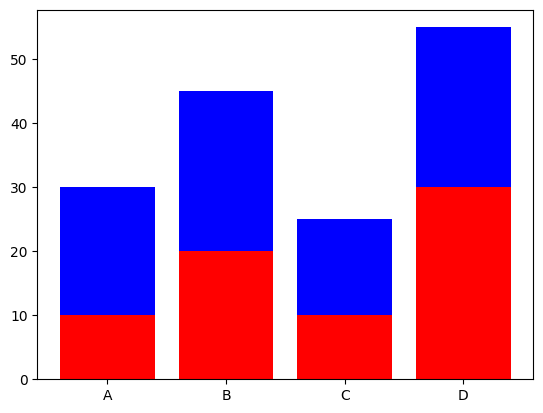

In [160]:
# importing package
import matplotlib.pyplot as plt
 
# create data
x = ['A', 'B', 'C', 'D']
y1 = [10, 20, 10, 30]
y2 = [20, 25, 15, 25]
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

In [176]:
#df_week
#['Date', 'Time_of_Day'])['Consumption_KWh'].sum()
date = df_week['Date'].unique().tolist()
Time_of_Day = df_week['Time_of_Day'].unique().tolist()
Consumption_KWh = df_week['Consumption_KWh'].tolist()

In [177]:
print(date)
print(Time_of_Day)
print(Consumption_KWh)

[Timestamp('2021-08-03 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-08-07 00:00:00'), Timestamp('2021-08-08 00:00:00'), Timestamp('2021-08-09 00:00:00')]
['Night', 'Morning', 'Afternoon', 'Evening']
[0.1, 0.073, 0.083, 0.073, 0.073, 0.078, 0.077, 0.076, 0.479, 0.214, 0.2, 0.211, 0.182, 0.228, 0.151, 0.192, 0.194, 0.221, 0.327, 0.341, 0.233, 0.237, 0.274, 0.216, 0.109, 0.079, 0.078, 0.076, 0.076, 0.077, 0.077, 0.075, 0.148, 0.154, 0.258, 0.176, 0.218, 0.209, 0.221, 0.203, 0.205, 0.263, 0.359, 0.362, 0.296, 0.148, 0.278, 0.407, 0.292, 0.402, 0.105, 0.578, 0.078, 0.074, 0.081, 0.074, 0.158, 0.65, 0.206, 0.257, 0.191, 0.23, 0.287, 0.227, 0.218, 0.208, 0.215, 0.077, 0.077, 0.199, 0.318, 0.575, 0.235, 0.084, 0.124, 0.096, 0.083, 0.073, 0.077, 0.08, 0.152, 0.154, 0.257, 0.302, 0.177, 0.22, 0.645, 0.192, 0.162, 0.183, 0.34, 0.376, 0.388, 0.347, 0.337, 0.506, 0.443, 0.268, 0.081, 0.085, 0.072, 0.081, 0.073, 0.0